In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# 设置字体为黑体大小为11
plt.rc('font', family='SimHei', size=11)
matplotlib.rcParams['axes.unicode_minus'] = False
pd.set_option('display.unicode.east_asian_width', True)

# 取消显示未来警告问题
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
pd.set_option('future.no_silent_downcasting', True)

In [8]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
data['AMZN'].value_counts()

AMZN
125.89    3
117.13    2
128.91    2
194.13    2
118.87    2
         ..
145.07    1
142.44    1
140.38    1
139.14    1
177.28    1
Name: count, Length: 483, dtype: int64

In [13]:
data = pd.read_excel('pydata09_1678066221127.xlsx', names=range(5))
data.head()

,0,1,2,3,4
0,2010-01-04,133.90,173.08,113.33,1
1,2010-01-05,134.69,176.14,113.63,2
2,2010-01-06,132.25,174.26,113.71,3
3,2010-01-07,130.00,177.67,114.19,1
4,2010-01-08,133.52,174.31,114.57,3


In [15]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
data

,Date,AMZN,GS,SPY,classify
0,2010-01-04,133.90,173.08,113.33,1
1,2010-01-05,134.69,176.14,113.63,2
2,2010-01-06,132.25,174.26,113.71,3
3,2010-01-07,130.00,177.67,114.19,1
4,2010-01-08,133.52,174.31,114.57,3
...,...,...,...,...,...
495,2011-12-19,179.33,87.70,120.29,1
496,2011-12-20,182.52,90.98,123.93,1
497,2011-12-21,174.35,92.00,124.17,2
498,2011-12-22,179.03,94.42,125.27,1


In [24]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
data_cat2 = data[data['classify'] == 2]
data_cat2.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,163,2010-12-09 08:23:33.496932608,2010-01-05 00:00:00,2010-06-26 00:00:00,2010-11-19 00:00:00,2011-05-10 12:00:00,2011-12-21 00:00:00,NaN
AMZN,163.0,164.374072,110.96,129.605,165.68,186.37,239.3,34.354364
GS,163.0,145.445337,88.81,135.94,150.4,160.745,184.92,22.229233
SPY,163.0,120.146715,102.76,112.671,120.03,127.62,136.43,8.902722
classify,163.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [27]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
data_cat3 = data[data['classify'] == 3]
data_cat3.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,168,2011-01-20 02:17:08.571428608,2010-01-06 00:00:00,2010-07-25 00:00:00,2011-01-26 00:00:00,2011-07-21 06:00:00,2011-12-14 00:00:00,NaN
AMZN,168.0,172.928452,108.61,132.01,181.89,199.445,243.88,35.550112
GS,168.0,141.071488,87.89,130.61,145.88,160.4125,179.5,24.206156
SPY,168.0,120.924352,102.2,113.6675,119.91,128.443125,135.73,8.818347
classify,168.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0


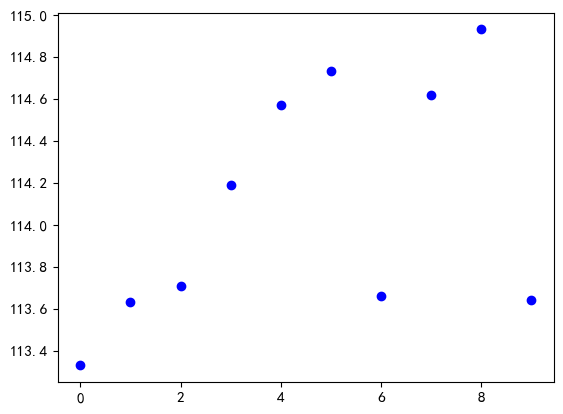

In [32]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
spy = data.iloc[:10]['SPY']
plt.scatter(range(10), spy, c='b')
plt.show()

In [52]:
data = pd.read_excel('pydata09_1678066221127.xlsx')
print(data)
ylabl = data['AMZN'][:499]
ylabl = ylabl.to_numpy().reshape(-1, 1)
xlabel = data['GS'][:499]
xlabel = xlabel.to_numpy().reshape(-1, 1)
xtest = data['GS'][499: 500]
xtest = xtest.to_numpy().reshape(-1, 1)
ytest = data['AMZN'][499: 500]
ytest = ytest.to_numpy().reshape(-1, 1)
print(xlabel)
print(ylabl)
print("xtest\n", xtest)
print("ytest\n", ytest)

          Date    AMZN      GS     SPY  classify
0   2010-01-04  133.90  173.08  113.33         1
1   2010-01-05  134.69  176.14  113.63         2
2   2010-01-06  132.25  174.26  113.71         3
3   2010-01-07  130.00  177.67  114.19         1
4   2010-01-08  133.52  174.31  114.57         3
..         ...     ...     ...     ...       ...
495 2011-12-19  179.33   87.70  120.29         1
496 2011-12-20  182.52   90.98  123.93         1
497 2011-12-21  174.35   92.00  124.17         2
498 2011-12-22  179.03   94.42  125.27         1
499 2011-12-23  177.28   93.79  126.39         1

[500 rows x 5 columns]
[[173.08]
 [176.14]
 [174.26]
 [177.67]
 [174.31]
 [171.56]
 [167.82]
 [169.07]
 [168.53]
 [165.21]
 [166.86]
 [167.79]
 [160.87]
 [154.12]
 [154.98]
 [150.88]
 [151.5 ]
 [153.29]
 [148.72]
 [153.13]
 [156.94]
 [157.23]
 [150.68]
 [154.16]
 [151.1 ]
 [152.49]
 [153.63]
 [154.05]
 [153.93]
 [157.4 ]
 [157.26]
 [155.73]
 [156.18]
 [156.71]
 [156.7 ]
 [158.33]
 [156.44]
 [156.35]
 [156.54

In [54]:
from sklearn import linear_model
from sklearn.metrics import r2_score

clf = linear_model.LinearRegression()
clf.fit(xlabel, ylabl)

predict = clf.predict(xtest)
predict

array([[206.35289051]])

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 假设您的Excel文件名为'amzn_data.xlsx'，'AMZN'是数据列名
# 读取Excel文件
df = pd.read_excel('pydata09_1678066221127.xlsx')

# 选择'AMZN'列作为时间序列数据
data = df['AMZN']

# 拟合ARMA模型，这里p和q都设置为1
arma_model = ARIMA(data, order=(1, 0, 1))
arma_results = arma_model.fit()

# 使用模型进行预测
forecast_steps = 1  # 预测未来1步
forecast = arma_results.forecast(steps=forecast_steps)
# 提取预测结果
stderr = forecast stderr
conf_int = forecast conf_int

# 绘制真实值和预测值
plt.figure(figsize=(10, 5))
plt.plot(data, label='Real AMZN', color='blue')
plt.plot(data.index[-len(data):] + pd.Timedelta(days=forecast_steps), forecast, label='Forecasted AMZN', color='red')
plt.fill_between(data.index[-len(data):] + pd.Timedelta(days=forecast_steps), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Real vs Forecasted AMZN')
plt.xlabel('Date')
plt.ylabel('AMZN Price')
plt.legend()
plt.show()


SyntaxError: invalid syntax (1715969778.py, line 20)